In [2]:
import pandas as pd
import numpy as np
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [124]:
data=pd.read_csv('precog/precogdata.csv')

In [125]:
data.head()

,0,1
0,Will donate thrice the number of upvotes (amou...,[R]eddiquette
1,"If you are not moved by this picture, I wish I...",Non-Political
2,Megathread: India-Pakistan border skirmish The...,[R]eddiquette
3,Image Of Smiling Baby For Hyderabad Police Off...,Non-Political
4,"This is India. Funny comments aside, it's act...",Politics


In [126]:
numdict={
    'Politics': 0,
 'Non-Political': 1,
 'AskIndia': 2,
 '[R]eddiquette': 3,
 'Science/Technology': 4,
 'Policy/Economy': 5,
 'Business/Finance': 6,
 'Scheduled': 7,
 'Sports': 8,
 'Food': 9,
 'Photography': 10
}

In [127]:
for i in range(len(data)):
    data.iloc[:,1][i]=numdict[data.iloc[:,1][i]]

In [128]:
data.head()

,0,1
0,Will donate thrice the number of upvotes (amou...,3
1,"If you are not moved by this picture, I wish I...",1
2,Megathread: India-Pakistan border skirmish The...,3
3,Image Of Smiling Baby For Hyderabad Police Off...,1
4,"This is India. Funny comments aside, it's act...",0


In [129]:
data.to_csv('precog/formatdata.csv', sep=',',index=False)

## work on formatted data

In [5]:
data=pd.read_csv('formatdata.csv')

In [6]:
data.head()

,0,1
0,Will donate thrice the number of upvotes (amou...,3
1,"If you are not moved by this picture, I wish I...",1
2,Megathread: India-Pakistan border skirmish The...,3
3,Image Of Smiling Baby For Hyderabad Police Off...,1
4,"This is India. Funny comments aside, it's act...",0


In [7]:
data.replace('\d+', 'NUM', regex=True)

,0,1
0,Will donate thrice the number of upvotes (amou...,3
1,"If you are not moved by this picture, I wish I...",1
2,Megathread: India-Pakistan border skirmish The...,3
3,Image Of Smiling Baby For Hyderabad Police Off...,1
4,"This is India. Funny comments aside, it's act...",0
5,No Yoga and Yoga. Difference Did they play me...,0
6,"Help, ideas needed. HLL poisoned my village wi...",3
7,"An Indian woman, a Japanese woman, and a Syria...",1
8,Incredible India. Where do these tourists alw...,1
9,My friend passed away and TOI made a mockery o...,3


# train test split 

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(data.iloc[:,0],data.iloc[:,1],test_size=0.15, random_state=1)


# Dump data to a MongoDB instance

In [51]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [52]:
db = client['reddit-databse']
collection = db['reddit-collection']


In [53]:
xtrain=list(xtrain)
xtest=list(xtest)
ytrain=list(ytrain)
ytest=list(ytest)
train=[]
for k in range(len(xtrain)):
    train.append([xtrain[k],ytrain[k]])
test=[]
for k in range(len(xtest)):
    train.append([xtest[k],ytest[k]])

postdata={'traindata':train,
         'testdata':test}

In [54]:
posts = db.posts
result = posts.insert_one(postdata)

### The collection was saved to a json file by the command
mongoexport -d reddit-databse -c posts -o data.json

# Vectorizing Text Data

In [134]:
cv=CountVectorizer(stop_words=stopwords.words("english"), analyzer='word',max_features=1000,token_pattern=r'\b[^\d\W]+\b')


In [135]:
x=cv.fit_transform(data.iloc[:,0])

In [136]:
len(cv.get_feature_names()),cv.get_feature_names()

(1000,
 ['_',
  'aadhaar',
  'aadhar',
  'able',
  'absolutely',
  'accept',
  'access',
  'account',
  'across',
  'act',
  'action',
  'actual',
  'actually',
  'ad',
  'add',
  'ads',
  'age',
  'ago',
  'agree',
  'air',
  'airtel',
  'allowed',
  'almost',
  'alone',
  'along',
  'already',
  'also',
  'although',
  'always',
  'amazing',
  'american',
  'among',
  'amount',
  'animals',
  'another',
  'answer',
  'anti',
  'anymore',
  'anyone',
  'anything',
  'anyway',
  'app',
  'appreciate',
  'area',
  'army',
  'around',
  'art',
  'article',
  'ask',
  'asked',
  'asking',
  'ass',
  'atleast',
  'attack',
  'attention',
  'aur',
  'available',
  'average',
  'away',
  'awesome',
  'b',
  'back',
  'background',
  'bad',
  'ban',
  'bangalore',
  'bank',
  'banned',
  'based',
  'basic',
  'basically',
  'bc',
  'beautiful',
  'become',
  'beef',
  'behind',
  'believe',
  'best',
  'better',
  'bhai',
  'bharat',
  'bhi',
  'big',
  'biggest',
  'bit',
  'bjp',
  'black',

In [137]:
cv.vocabulary_

{'donate': 227,
 'number': 596,
 'amount': 32,
 'rs': 735,
 'get': 333,
 'thread': 874,
 'next': 586,
 'hours': 401,
 'note': 593,
 'want': 929,
 'know': 458,
 'cause': 128,
 'much': 562,
 'read': 704,
 'amazing': 29,
 'write': 974,
 'u': 908,
 'new': 583,
 'well': 944,
 'https': 406,
 'www': 978,
 'reddit': 715,
 'com': 152,
 'r': 695,
 'india': 422,
 'comments': 157,
 'also': 26,
 'check': 135,
 'comment': 156,
 'kerala': 449,
 'link': 488,
 'since': 787,
 'easily': 240,
 'b': 60,
 'youtube': 990,
 'watch': 934,
 'v': 918,
 'edit': 244,
 'damn': 199,
 'dont': 229,
 'wait': 927,
 'complete': 163,
 'keep': 448,
 'decided': 206,
 'net': 579,
 'day': 201,
 'rest': 726,
 'proof': 684,
 'imgur': 416,
 'jpg': 440,
 'morning': 555,
 'big': 82,
 'great': 355,
 'folks': 302,
 'stupid': 842,
 'always': 28,
 'remember': 719,
 'every': 262,
 'c': 114,
 'youtu': 989,
 'gone': 348,
 'front': 319,
 'page': 618,
 'posted': 668,
 'part': 625,
 'sort': 808,
 'please': 655,
 'far': 284,
 'huge': 407,
 '

In [ ]:
tf=TfidfTransformer()

In [ ]:
tfx=tf.fit_transform(x)

In [ ]:
tfx.toarray()

# TF-IDF


In [9]:
idf=TfidfVectorizer(stop_words=stopwords.words("english"), analyzer='word',max_features=1000,token_pattern=r'\b[^\d\W]+\b')

xdf=idf.fit_transform(xtrain)
xdt=idf.transform(xtest)


# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

cl=LogisticRegression()

cl.fit(xdf,ytrain)

cl.score(xdt,ytest)

0.676056338028169

# SVM Classifier

In [144]:
clf=LinearSVC()
clf.fit(xdf,ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [145]:
clf.score(xdt,ytest)

0.6830985915492958

 # naive bayes 

In [146]:
clf2=GaussianNB()

clf2.fit(xdf.toarray(),ytrain)

clf2.score(xdt.toarray(),ytest)

0.5563380281690141

# dense neural network

In [147]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [148]:
model = Sequential()
model.add(Dense(512, input_shape=(1000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(11))
model.add(Activation('softmax'))

In [149]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [151]:
nn = model.fit(xdf, utils.to_categorical(ytrain, 11),
                    batch_size=30,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)

Train on 721 samples, validate on 81 samples
Epoch 1/20
721/721 [==============================] - 0s 466us/step - loss: 0.0868 - acc: 0.9931 - val_loss: 1.2211 - val_acc: 0.6420
Epoch 2/20
721/721 [==============================] - 0s 463us/step - loss: 0.0793 - acc: 0.9972 - val_loss: 1.2157 - val_acc: 0.6543
Epoch 3/20
721/721 [==============================] - 0s 453us/step - loss: 0.0695 - acc: 0.9986 - val_loss: 1.2810 - val_acc: 0.6296
Epoch 4/20
721/721 [==============================] - 0s 481us/step - loss: 0.0582 - acc: 0.9986 - val_loss: 1.2828 - val_acc: 0.6420
Epoch 5/20
721/721 [==============================] - 0s 474us/step - loss: 0.0667 - acc: 0.9972 - val_loss: 1.2464 - val_acc: 0.6543
Epoch 6/20
721/721 [==============================] - 0s 450us/step - loss: 0.0505 - acc: 0.9986 - val_loss: 1.3061 - val_acc: 0.6173
Epoch 7/20
721/721 [==============================] - 0s 456us/step - loss: 0.0449 - acc: 0.9986 - val_loss: 1.2947 - val_acc: 0.6543
Epoch 8/20
721/72

In [152]:
score = model.evaluate(xdt,utils.to_categorical(ytest, 11),
                       batch_size=30, verbose=1)
score

142/142 [==============================] - 0s 123us/step


[1.3225058208049183, 0.7042253462361617]

In [153]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)                5643      
_________________________________________________________________
activation_4 (Activation)    (None, 11)                0         
Total params: 518,155
Trainable params: 518,155
Non-trainable params: 0
_________________________________________________________________


# Summarizing results for different models on tf-idf data

In [154]:
data1=[]
data2=[]
datann=[]
datalr=[]
clf1=LinearSVC()
clf2=GaussianNB()
cl=LogisticRegression()
for i in range(1,8):
    xtr=xdf[0:i*100]
    ytr=ytrain[0:i*100]
    clf1.fit(xtr,ytr)
    clf2.fit(xtr.toarray(),ytr)
    cl.fit(xtr,ytr)
    model.fit(xtr, utils.to_categorical(ytr, 11),
                    batch_size=30,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)
    
    data1.append(clf1.score(xdt,ytest))
    data2.append(clf2.score(xdt.toarray(),ytest))
    datalr.append(cl.score(xdt,ytest))
    datann.append(model.evaluate(xdt,utils.to_categorical(ytest, 11),
                       batch_size=10, verbose=1)[1])
    
    
    

Train on 90 samples, validate on 10 samples
Epoch 1/20
90/90 [==============================] - 0s 567us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.0086 - val_acc: 1.0000
Epoch 2/20
90/90 [==============================] - 0s 474us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 3/20
90/90 [==============================] - 0s 410us/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 4/20
90/90 [==============================] - 0s 483us/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 5/20
90/90 [==============================] - 0s 496us/step - loss: 0.0169 - acc: 1.0000 - val_loss: 0.0086 - val_acc: 1.0000
Epoch 6/20
90/90 [==============================] - 0s 514us/step - loss: 0.0103 - acc: 1.0000 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 7/20
90/90 [==============================] - 0s 447us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 8/20
90/90 [==============

Epoch 19/20
540/540 [==============================] - 0s 430us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 20/20
142/142 [==============================] - 0s 381us/step
Train on 630 samples, validate on 70 samples
Epoch 1/20
630/630 [==============================] - 0s 455us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0101 - val_acc: 1.0000
Epoch 2/20
630/630 [==============================] - 0s 561us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 3/20
630/630 [==============================] - 0s 472us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0116 - val_acc: 1.0000
Epoch 4/20
630/630 [==============================] - 0s 450us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 5/20
630/630 [==============================] - 0s 369us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 6/20
630/630 [==============================] - 0s 482us/step - loss: 0.001

In [155]:
import matplotlib.pyplot as plt

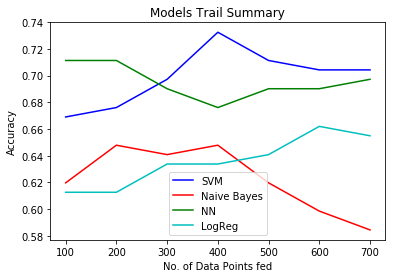

In [156]:
plt.plot([100,200,300,400,500,600,700],data1,color='b')
plt.plot([100,200,300,400,500,600,700],data2,color='r')
plt.plot([100,200,300,400,500,600,700],datann,color='g')
plt.plot([100,200,300,400,500,600,700],datalr,color='c')
plt.gca().legend(('SVM','Naive Bayes','NN','LogReg'))
plt.xlabel('No. of Data Points fed')
plt.ylabel('Accuracy')
plt.title('Models Trail Summary')
plt.show()

## Clearly SVM is performing much better overall

### Also both SVM and NN are saturating at aroud 600 data points

### In this case where datapoints are less the best option would be to use transfer learning like a trained word2vec model for vectorization of words and a trained classification model like ElMo and Google's BERT

# Final Training of SVM Model with the whole data via TF-IDF

In [157]:
tok=TfidfVectorizer(stop_words=stopwords.words("english"), analyzer='word',max_features=1000,token_pattern=r'\b[^\d\W]+\b')


In [158]:
X=tok.fit_transform(data.iloc[:,0])
Y=data.iloc[:,1]

In [159]:
classifier=LinearSVC()
classifier.fit(X,Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [160]:
classifier.score(X,Y)

0.975635593220339

### making a pickle dump of the model to be used in the webapp

In [161]:
import pickle

In [162]:
file=open('precog/model.obj','wb')
pickle.dump(classifier,file)
file2=open('precog/tfidf.obj','wb')
pickle.dump(tok,file2)

# Confusion matrix of SVM On train and test

In [10]:
clf=LinearSVC()
clf.fit(xdf,ytrain)
pred=clf.predict(xdt)

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(ytest,pred)

array([[11, 11,  0,  1,  0,  2,  0,  0,  0,  0],
       [ 5, 76,  0,  4,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  1]])

Using Plot from sklearn https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [19]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[11 11  0  1  0  2  0  0  0  0]
 [ 5 76  0  4  0  0  0  1  1  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 2  6  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  6  0  0  0  0  0  0  0  1]]


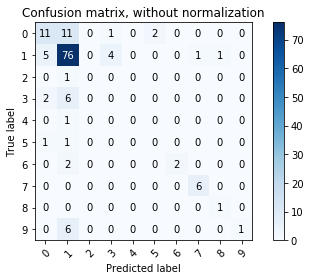

In [20]:
plot_confusion_matrix(ytest, pred, classes=[i for i in range(12)],
                      title='Confusion matrix, without normalization')

## F1 score for SVM on train and test .  (precision and recall measure)

In [22]:
from sklearn.metrics import f1_score

In [24]:
f1_score(ytest,pred,average='weighted')

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.650404203986167